# Evolent Health: Beer Data Analysis
#### The project descriptions, questions and datasets were all downloaded from Strata Scratch. 
#### According to Strata Scratch, this data project has been used as a take-home assignment in the recruitment process for the data science positions at Evolent Health. 

### Assignment: 
- Rank the top 3 breweries which produce the strongest beers.
- Which year did beers enjoy the highest ratings?
- Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
- If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
- Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

### About the dataset(s): 
- Source: https://platform.stratascratch.com/data-projects/beer-data-analysis
- Description: The provided compressed file `EvolentHealth_data_beer.tar.bz2` contains data about beers and their reviews

### Data Dictionary:

**EvolentHealth_data_beer.tar.bz2**

| variable               | description                            |
|:-----------------------|:---------------------------------------|
| beer_ABV               | alcohol by volume                      |
| beer_beerId            | beer ID                                |
| beer_brewerId          | beer brewer ID                         |
| beer_name              | beer name                              |
| beer_style             | beer style                             |
| review_appearance      | review on the beer's appearance        |
| review_palette         | review on the beer's palette (colours) |
| review_overall         | overall beer review                    |
| review_taste           | review on the beer's taste             |
| review_profileName     | profile name of the reviewer           |
| review_aroma           | review on the beer's aroma             |
| review_text            | the full text of the review            |
| review_time            | timestamp when the review was made     |

## Q0. EDA

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

os.chdir(path="/Users/noel/Desktop/2023_projects/datasets")
df = pd.read_csv("EvolentHealth_data_beer.tar.bz2", compression="bz2")

display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


None

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


### - Remove NAs

(528870, 13)


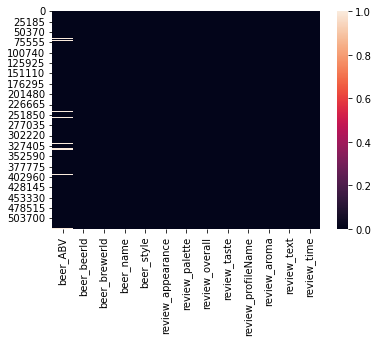

(508358, 13)


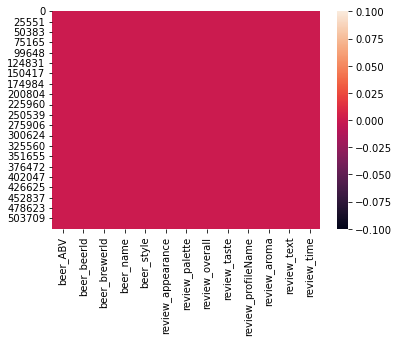

In [2]:
print(df.shape)
pre_na = sns.heatmap(df.isna()); plt.show()
df = df.dropna()

print(df.shape)
post_na = sns.heatmap(df.isna()); plt.show()

### - Remove duplicates

In [3]:
pd.DataFrame(df.groupby("review_profileName")[["beer_beerId", "review_time"]].count())

,beer_beerId,review_time
review_profileName,,
0110x011,46,46
03SVTCobra,3,3
04101Brewer,2,2
05Harley,37,37
0runkp0s,1,1
...,...,...
zymrgy,2,2
zymurgy4all,27,27
zymurgywhiz,1,1


In [4]:
df_reviews_of_each_profile = pd.DataFrame(df.groupby("review_profileName")[["beer_beerId", "review_time"]].count()).reset_index()
df_reviews_of_each_profile = df_reviews_of_each_profile.sort_values(by="beer_beerId", ascending=False)
display(df_reviews_of_each_profile.head())

df = df.drop_duplicates(subset=["review_profileName", "beer_beerId"], keep="first").reset_index(drop=True)
print(df.shape)
df.head()

,review_profileName,beer_beerId,review_time
18245,northyorksammy,1732,1732
17419,mikesgroove,1320,1320
1646,BuckeyeNation,1212,1212
6620,Phyl21ca,1152,1152
22236,womencantsail,1113,1113


(503700, 13)


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


## Q1: Rank the top 3 breweries which produce the strongest beers.

In [5]:
# check skewness before deciding whether to use mean/median
from scipy.stats import skewtest
print(skewtest(df.beer_ABV))

# group the brewer and rank by their medians
ans_q1 = df.groupby("beer_brewerId").agg(median_ABV=("beer_ABV", "median")).reset_index()
ans_q1 = ans_q1.sort_values(by="median_ABV")

ans_q1["rank_by_median"] = ans_q1["median_ABV"].rank(method="min", ascending=False)
ans_q1 = ans_q1.sort_values(by="rank_by_median", ascending=True)

# output
ans_q1 = ans_q1[ans_q1.rank_by_median<=3]
ans_q1

SkewtestResult(statistic=318.3167088772542, pvalue=0.0)


,beer_brewerId,median_ABV,rank_by_median
165,736,14.0,1.0
636,5562,13.2,2.0
8,36,13.0,3.0
699,6513,13.0,3.0


## Q2: Which year did beers enjoy the highest ratings?

In [6]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')